In [1]:
print('Loading Handwritted Digits...')
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
images = digits.data.reshape(-1, 8, 8)
labels = digits.target

print('Selecting only 1s and 0s...')
whereOnes = np.where(labels == 1, 1, 0)
images_ones = images[whereOnes==1]
whereZeros = np.where(labels == 0, 1, 0)
images_zeros = images[whereZeros==1]
INPUT = np.r_[images_ones.ravel(), images_zeros.ravel()].reshape(-1, 8, 8)
LABEL = np.r_[labels[whereOnes == 1], labels[whereZeros ==1]]

print('Shuffling...')
np.random.seed(1)
randomize = np.arange(len(INPUT))
np.random.shuffle(randomize)

INPUT = INPUT[randomize]
LABEL = LABEL[randomize]

Loading Handwritted Digits...
Selecting only 1s and 0s...
Shuffling...


Visualizing Labels & Raw Input...


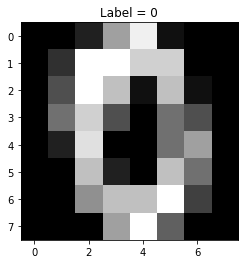

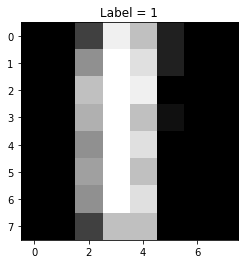

In [2]:
%matplotlib inline
print('Visualizing Labels & Raw Input...')
import matplotlib.pyplot as plt
img_no = 0
plt.imshow(INPUT[img_no], cmap="gray")
plt.title(label = f'Label = {LABEL[img_no]}')
plt.show()

img_no = 10
plt.imshow(INPUT[img_no], cmap="gray", label = 'Y = {LABEL[1]}')
plt.title(label = f'Label = {LABEL[img_no]}')
plt.show()

In [3]:
import warnings
warnings.filterwarnings("ignore")
from keras.layers import Input, Dense, Flatten, Conv2D
from keras.models import Model

Using TensorFlow backend.


In [4]:
print('Preprocessing...')
INPUT = INPUT.reshape(360, 8, 8, 1)
LABEL = LABEL.reshape(-1, 1)
X_train, X_test = INPUT[:300, :, :, :], INPUT[300:, :, :, :]
y_train, y_test = LABEL[:300, :], LABEL[300:, :]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Preprocessing...
(300, 8, 8, 1) (60, 8, 8, 1)
(300, 1) (60, 1)


In [5]:
def CNN(input_shape):
    X_input = Input(input_shape, name = 'Layer_0')
    X = Conv2D(1, (3, 3), strides = (1, 1), name = 'Layer_1')(X_input)
    X = Flatten(name = 'Layer_2_1')(X)
    X = Dense(1, activation='sigmoid', name = 'Layer_2_2')(X)
    model = Model(inputs = X_input, outputs = X, name='MNIST-CNN')
    return model

In [6]:
shape = X_train[0, :, :, :].shape
MNIST_CNN = CNN(shape)
MNIST_CNN.compile(optimizer='SGD', loss='binary_crossentropy',  metrics = ["accuracy"])
MNIST_CNN.fit(x = X_train, y = y_train, epochs = 10, batch_size = 32)

Epoch 1/10
300/300 [==============================] - 0s 2ms/step - loss: 0.4118 - acc: 0.9200
Epoch 2/10
300/300 [==============================] - 0s 60us/step - loss: 0.1480 - acc: 0.9700
Epoch 3/10
300/300 [==============================] - 0s 59us/step - loss: 0.1300 - acc: 0.9700
Epoch 4/10
300/300 [==============================] - 0s 61us/step - loss: 0.1140 - acc: 0.9767
Epoch 5/10
300/300 [==============================] - 0s 63us/step - loss: 0.1017 - acc: 0.9800
Epoch 6/10
300/300 [==============================] - 0s 64us/step - loss: 0.0925 - acc: 0.9833
Epoch 7/10
300/300 [==============================] - 0s 61us/step - loss: 0.0865 - acc: 0.9833
Epoch 8/10
300/300 [==============================] - 0s 63us/step - loss: 0.0792 - acc: 0.9800
Epoch 9/10
300/300 [==============================] - 0s 61us/step - loss: 0.0696 - acc: 0.9833
Epoch 10/10
300/300 [==============================] - 0s 61us/step - loss: 0.0656 - acc: 0.9833


In [7]:
preds = MNIST_CNN.evaluate(x = X_test, y = y_test)
print(f"Test Loss = {preds[0]:0.4}, Test Accuracy = {preds[1]:0.4}")

60/60 [==============================] - 0s 667us/step
Test Loss = 0.09569, Test Accuracy = 0.95


In [8]:
MNIST_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_0 (InputLayer)         (None, 8, 8, 1)           0         
_________________________________________________________________
Layer_1 (Conv2D)             (None, 6, 6, 1)           10        
_________________________________________________________________
Layer_2_1 (Flatten)          (None, 36)                0         
_________________________________________________________________
Layer_2_2 (Dense)            (None, 1)                 37        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


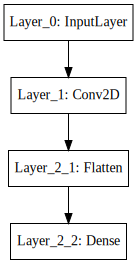

In [9]:
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
import pydot
from IPython.display import SVG
plot_model(MNIST_CNN, to_file='MNIST-CNN.png')
SVG(model_to_dot(MNIST_CNN).create(prog='dot', format='svg'))